In [1]:
from tensorflow import keras

keras.utils.set_random_seed(42)

/Users/hieu1966hn/Desktop/MindX/MindX-CS/HDT/HDT-CSI14/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# Chuẩn bị dữ liệu

## Tải dữ liệu
Tải bộ dữ liệu MNIST từ keras sử dụng `keras.datasets.mnist.load_data` và chia thành hai tập train, test.

In [34]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

Sử dụng thuộc tính `shape` để kiểm tra kích thước bộ dữ liệu train và test.\
Có bao nhiêu ảnh thuộc tập train và bao nhiêu ảnh thuộc tập test?

In [35]:
### YOUR CODE HERE
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

Để biểu diễn thử một ảnh từ bộ dữ liệu, ta sử dụng thư viện `PIL` và `matplotlib.pyplot`

In [36]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

Chọn ảnh đầu tiên trong tập train và vẽ ảnh bằng pyplot.\
Chọn tên của ảnh là label trong tập train tương ứng.

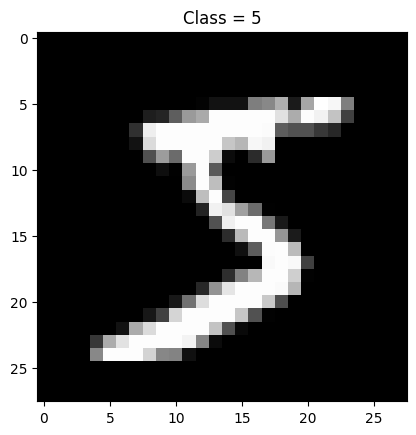

In [37]:
img = Image.fromarray(X_train[0])
plt.imshow(img, cmap='gray') # Sử dụng cmap='gray' vì ảnh trắng đen
plt.title(f"Class = {Y_train[0]}")
plt.show()

## Biến đổi dữ liệu X
Để huấn luyện mô hình được ổn định và hiệu quả, ta nên scale khoảng giá trị của hình từ 0...255 thành 0...1

In [39]:
x_train = X_train.astype("float32") / 255 
x_test = X_test.astype("float32") / 255 

In [40]:
# Kiểm tra chiều của X
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

Ta cần đảm bảo dữ liệu x_train và x_test vào có format `(n, w, h, d)` để huấn luyện.

Trong đó:
* `n` là số hình
* `w` là chiều rộng
* `h` là chiều cao
* `d` là số chiều (ở bài tập này ta chọn d=1 vì hình trắng đen, nếu hình có màu RGB thì d=3)

Sử dụng `np.expand_dims()` để thêm chiều ở cuối.
> *Ví dụ: x_train có shape là `(60000, 28, 28)` cần phải được chuyển sang shape là `(60000, 28, 28, 1)`*


In [ ]:
# Thêm chiều ở cuối
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Kiểm tra lại shape
print("x_train new shape:", x_train.shape)

x_train new shape: (60000, 28, 28, 1, 1, 1, 1)


## Biến đổi dữ liệu Y

In [41]:
# Kiểm tra chiều của Y
Y_train.shape, Y_test.shape

((60000,), (10000,))

Cần chuyển kiểu dữ liệu của y_train và y_test từ dạng số (numerical) sang dạng phân loại (categorical).
> *Ví dụ: y_train có shape là (60000,) cần phải được chuyển sang shape mới là (60000, số_lớp)*

In [42]:
num_classes = 10  # từ 0 đến 9 là 10 loại (class)
y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(Y_test, num_classes)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


# Mô hình CNN
## Xây dựng mô hình
Hãy xác định `input_shape` với kích thước đầu vào là `(h, w, d)` của một hình ảnh.\
Mô hình ở dưới đã được định nghĩa sẵn block Conv2D thứ nhất, gồm 1 layer Conv2D(units=32) và một layer MaxPooling2D. Hãy hoàn thiện các layer còn lại của mô hình.

In [43]:
input_shape = (28, 28, 1)

model = keras.Sequential([
    # Conv2D Block #1
    keras.layers.Conv2D(32, kernel_size=(3, 3), input_shape=input_shape),    # Layer tích chập
    keras.layers.MaxPooling2D(pool_size=(2,2)),                              # Layer MaxPool luôn theo sau layer Conv
    
    # Conv2D Block #2 với 64 units
    keras.layers.Conv2D(64, kernel_size=(3, 3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)), 
    
    ### YOUR CODE HERE
    # Layer Flatten
    keras.layers.Flatten(),
    keras.layers.Dense(num_classes, activation='softmax'),                # Layer phân loại
])

model.compile(optimizer='adam',             # Sử dụng optimizer mặc định
              loss="categorical_crossentropy",      # Thay đổi loss cho phù hợp với bài toán phân loại nhiều lớp
              metrics=['accuracy'])               # Sử dụng metrics là accuracy phù hợp với bài toán phân loại
              
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

## Huấn luyện mô hình
Hãy huấn luyện mô hình với các tham số là `batch_size=128` và `epochs=5`.
* `batch_size` là số ảnh được xử lý mỗi lần mô hình cập nhật
* `epochs` là số lần huấn luyện trên dữ liệu

Ta sử dụng thêm tham số `validation_split` để tách 10% từ tập train thành tập validation, đảm bảo mô hình không bị thiên kiến (biased) với dữ liệu tập train.

In [44]:
batch_size = 128
epochs = 5
model.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.1) 

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.8364 - loss: 0.6107 - val_accuracy: 0.9763 - val_loss: 0.0870
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9721 - loss: 0.0946 - val_accuracy: 0.9830 - val_loss: 0.0613
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9808 - loss: 0.0646 - val_accuracy: 0.9837 - val_loss: 0.0563
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9844 - loss: 0.0520 - val_accuracy: 0.9835 - val_loss: 0.0544
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9864 - loss: 0.0450 - val_accuracy: 0.9837 - val_loss: 0.0543


# Đánh giá mô hình
Hãy sử phương thức `evaluate` để đánh giá mô hình trên tập test.\
Giá trị trả về là một tuple chứa kết quả loss và accuracy trên tập test.

In [45]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9800 - loss: 0.0595
Test accuracy: 0.984000027179718


# Dự đoán một hình
Hãy biểu diễn hình đầu tiên của tập test bằng matplotlib.\
Sử dụng `plt.title` để vẽ tên của hình là lớp tương ứng của hình.

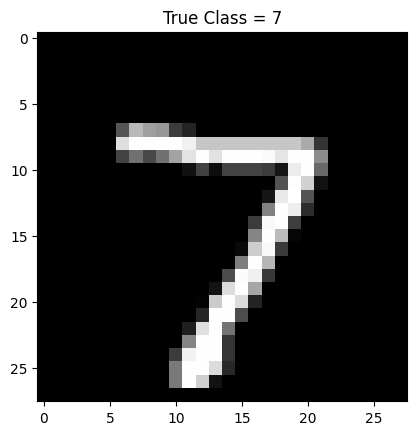

In [46]:
test_img = X_test[0]
img = Image.fromarray(test_img)
plt.imshow(img, cmap='gray')
plt.title(f'True Class = {Y_test[0]}')
plt.show()

In [47]:
# Kiểm tra shape của hình
test_img.shape

(28, 28)

Vì layer Dense ở cuối có 10 units nên kết quả của `predict` cũng trả về một numpy array có 10 giá trị, mỗi giá trị là tỉ lệ mà hình thuộc lớp tương ứng.
> Ví dụ: Mô hình phân loại 4 lớp có kết quả predict là `[0.1, 0.2, 0.7, 0.0]` nghĩa là hình có 10% thuộc lớp thứ nhất, 20% thuộc lớp thứ hai, 70% thuộc lớp thứ ba và 0% thuộc lớp cuối cùng.

> Lưu ý: Tổng tất cả các tỉ lệ của mảng kết quả luôn bằng 1, tương ứng với 100%.

In [48]:
test_img = np.expand_dims(test_img, 0) # Thêm chiều n=1 để đảm bảo hình có đủ các chiều (n, h, w)
preds = model.predict(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Sử dụng `np.argmax()` để lấy số thứ tự của lớp mà mô hình tự tin nhất.\
Ở đây số thứ tự vô tình trùng với tên của các lớp chữ số 0...9.

In [49]:
test_prediction  = np.argmax(preds)
print("Predicted class:", test_prediction)

Predicted class: 7
